In [24]:
#trip.csv import하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

taxi_data = pd.read_csv('/aiffel/data/trip.csv')
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [25]:
#데이터 정보

taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [26]:
# 수치형 데이터 확인

taxi_data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [27]:
# 범주형 데이터 확인

taxi_data['payment_method'].value_counts()

Cash           11196
Debit Card      5783
Credit Card     5722
Name: payment_method, dtype: int64

In [30]:
# 결측치 확인

taxi_data.isnull().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [13]:
# 결측치 처리. 평균값으로 변환

taxi_data['fare_amount'].fillna(taxi_data['fare_amount'].mean(), inplace=True)

taxi_data.isnull().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

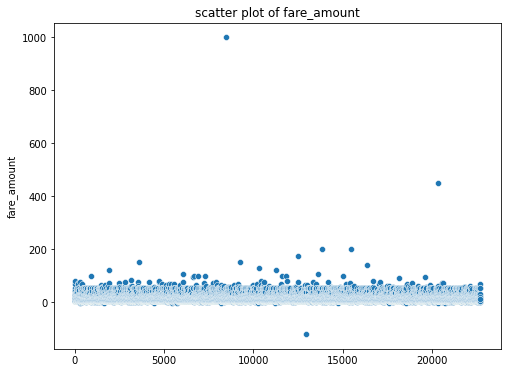

In [31]:
# 이상치를 확인 하고 제거

plt.figure(figsize=(8,6))
sns.scatterplot(x=taxi_data.index, y='fare_amount', data=taxi_data)
plt.title('scatter plot of fare_amount')
plt.show()

In [37]:
# 이상치 처리

taxi_data=taxi_data[taxi_data['fare_amount'] < 200]
